In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import itertools

# Q1

In [ ]:
A = np.matrix([[3.,-2.],[-2.,5.]])
b = np.matrix([[-1.],[8.]])
c = 2.

In [ ]:
def f(x,A,b,c):
    return float(0.5*x.T*A*x - b.T*x + c)
def paraboloid(A,b,c):
    fig = plt.figure(figsize=(8,5))
    qf  = fig.gca(projection='3d')
    size= 40
    x1  = list(np.linspace(-3,3,size))
    x2  = list(np.linspace(-3,3,size))
    x1, x2 = np.meshgrid(x1,x2)
    zs = np.zeros((size,size))
    for i in range(size):
        for j in range(size):
            x = np.matrix([[x1[i,j]],[x2[i,j]]])
            zs[i,j] = f(x,A,b,c)
    qf.plot_surface(x1,x2,zs,rstride=1,cstride=1,cmap=cm.rainbow,linewidth=0)
    fig.show()
    return x1, x2, zs

<ipython-input-3-ced02d8babae>:5: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  qf  = fig.gca(projection='3d')


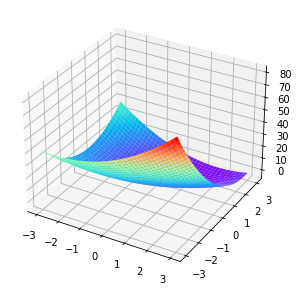

In [ ]:
x1,x2,zs = paraboloid(A,b,c)

In [ ]:
def contoursteps(x1,x2,zs,steps=None):
    fig = plt.figure(figsize=(8,8))
    levels = range(-9,9)
    cp = plt.contour(x1,x2,zs,levels)
    plt.clabel(cp,inline=1,fontsize=8)
    plt.grid(True)
    if steps is not None:
        steps = np.matrix(steps)
        plt.plot(steps[:,0],steps[:,1],'-o')
    fig.show()

i: 0
r^Tr =  [[-3.55271368e-15]]
P^TAP =  [[-1.77635684e-14]]
i: 1
r^Tr =  [[-9.11633836e-16]]
P^TAP =  [[-1.83610758e-15]]


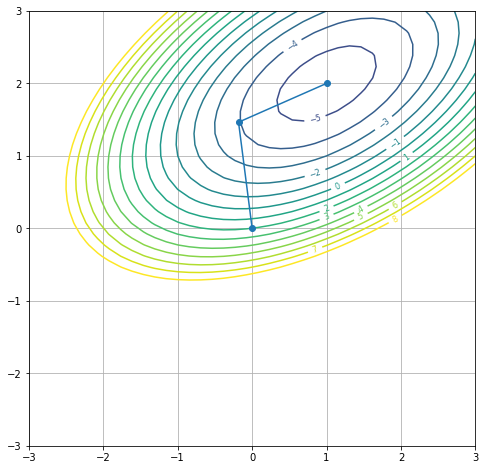

In [ ]:
x = np.matrix([[0.],[0.]])
steps = [(0.,0.)] # steps is a list and the tuple (-1,-1) is the initial position
i = 0
imax = 3
eps = 0.01
r = b - A * x
p = r
deltanew = r.T * r
delta0 = deltanew
while i < imax and deltanew > eps**2 * delta0:
    print('i:',i)
    alpha = float(deltanew / float(p.T * (A * p)))
    x = x + alpha * p
    steps.append((x[0,0],x[1,0]))
    print('r^Tr = ',np.dot(r.T,(r - alpha * (A * p))))
    r = r - alpha * (A * p)
    
    deltaold = deltanew
    deltanew = r.T * r
    beta = float(deltanew / float(deltaold))
    print('P^TAP = ',np.dot(p.T,A*(r + beta * p)))
    p = r + beta * p
    i += 1
    
contoursteps(x1, x2, zs, steps)


# Q2

$$g(z)=\frac{1}{1+e^{-z}}$$

(a)
\begin{align}
g(z)+g(-z)&=\frac{1}{1+e^{-z}}+\frac{1}{1+e^{z}}\\
&=\frac{1}{1+e^{-z}}+\frac{e^{-z}}{1+e^{-z}}\\
&=1
\end{align}

(b)
\begin{align}
g'(z)&=\frac{d}{dz}\frac{1}{1+e^{-z}}\\
&=\frac{-(-e^{-z})}{(1+e^{-z})^2}\\
&=\frac{e^{-z}}{1+2e^{-z}+e^{-2z}}\\
&=\frac{1}{e^{z}+2+e^{-z}}\\
&=\frac{1}{(1+e^{-z})(1+e^{z})}\\
&=g(z)g(-z)
\end{align}
From (a),
$$g(-z)=1-g(z)$$ so

$$g'(z)=g(z)g(-z)=g(z)[1-g(z)]$$

(c) \\
From (b)
$$g'(z)=g(z)g(-z)$$
$$g'(-z)=g(-z)g(z)=g(z)g(-z)=g'(z)$$

Or, from(a)
$$g(z)+g(-z)=1$$
Differentiate both side w.r.t. z 
$$g'(z)-g'(-z)=0$$
$$g'(z)=g'(-z)$$

$\star$ Please note that
$$g'(-z)=\frac{dg(z)}{dz}|_{-z}$$
instead of
$$\frac{dg(-z)}{dz}=-g'(z)$$

(d) \\
From (b)
$$g'(z)=g(z)g(-z)$$
\begin{align}
g''(z)&=\frac{d}{dz}[g(z)g(-z)] \\
&=g'(z)g(-z)+g(z)g'(-z)(-1) \\
&=g(z)g(-z)g(-z)-g(z)g(z)g(-z) \\
&=g(z)g(-z)[g(-z)-g(z)]
\end{align}